# Regression on the Linnerud dataset

In [1]:
# Imports

import numpy as np 
from sklearn.datasets import load_linnerud
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Load data
data = load_linnerud()

print(data["DESCR"])

.. _linnerrud_dataset:

Linnerrud dataset
-----------------

**Data Set Characteristics:**

    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset is a multi-output regression dataset. It consists of three
exercise (data) and three physiological (target) variables collected from
twenty middle-aged men in a fitness club:

- *physiological* - CSV containing 20 observations on 3 physiological variables:
   Weight, Waist and Pulse.
- *exercise* - CSV containing 20 observations on 3 exercise variables:
   Chins, Situps and Jumps.

.. topic:: References

  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris:
    Editions Technic.



In [3]:
# Extract features and targets 
features = data["data"]
targets = data["target"]
feature_names = data["feature_names"]
target_names = data["target_names"]

print("Features names:\n", feature_names, "\n")
print("Features:\n", features, "\n")
print("Target names:\n", target_names, "\n")
print("Targets:\n", targets, "\n")

# Shape of features and targets
print("Features shape:", features.shape)
print("Targets shape:", targets.shape)

Features names:
 ['Chins', 'Situps', 'Jumps'] 

Features:
 [[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]
 [  4. 101.  42.]
 [  8. 101.  38.]
 [  6. 125.  40.]
 [ 15. 200.  40.]
 [ 17. 251. 250.]
 [ 17. 120.  38.]
 [ 13. 210. 115.]
 [ 14. 215. 105.]
 [  1.  50.  50.]
 [  6.  70.  31.]
 [ 12. 210. 120.]
 [  4.  60.  25.]
 [ 11. 230.  80.]
 [ 15. 225.  73.]
 [  2. 110.  43.]] 

Target names:
 ['Weight', 'Waist', 'Pulse'] 

Targets:
 [[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]
 [182.  36.  56.]
 [211.  38.  56.]
 [167.  34.  60.]
 [176.  31.  74.]
 [154.  33.  56.]
 [169.  34.  50.]
 [166.  33.  52.]
 [154.  34.  64.]
 [247.  46.  50.]
 [193.  36.  46.]
 [202.  37.  62.]
 [176.  37.  54.]
 [157.  32.  52.]
 [156.  33.  54.]
 [138.  33.  68.]] 

Features shape: (20, 3)
Targets shape: (20, 3)


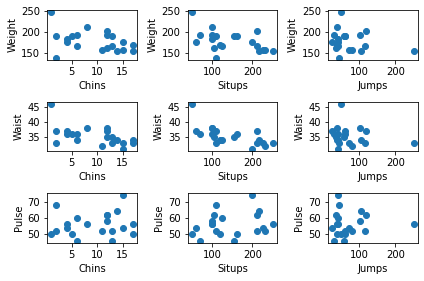

In [4]:
# Visualize the data
import matplotlib.pyplot as plt 

fig, axs = plt.subplots(3, 3)

for i in range(targets.shape[1]):
    for j in range(features.shape[1]):
        axs[i][j].scatter(features[:,j], targets[:,i])
        axs[i][j].set_xlabel(feature_names[j])
        axs[i][j].set_ylabel(target_names[i])

fig.tight_layout()
plt.show()

**Data does not seem to be linear.** Don't expect much from a linear model.

In [5]:
# Split into training and test
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2)

print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)
print("Train targets shape:", train_targets.shape)
print("Test targets shape:", test_targets.shape)

Train features shape: (16, 3)
Test features shape: (4, 3)
Train targets shape: (16, 3)
Test targets shape: (4, 3)


In [6]:
# Fit linear regression model
reg = LinearRegression().fit(train_features, train_targets)


# Compute Euclidean error
train_predictions = reg.predict(train_features)
test_predictions = reg.predict(test_features)

train_error = np.mean((train_predictions - train_targets)**2)
test_error = np.mean((test_predictions - test_targets)**2)

print("Train, test errors:", train_error, test_error)

Train, test errors: 178.9262872461969 83.97247424828267


## Try second order polynomial expansion

In [7]:
from sklearn.preprocessing import PolynomialFeatures

# Compute second order polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=False)
train_features = poly.fit_transform(train_features)
test_features = poly.fit_transform(test_features)

print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


# Fit regression model again
reg = LinearRegression().fit(train_features, train_targets)


# Euclidean errors
train_error = np.sqrt(np.mean((train_predictions - train_targets)**2))
test_error = np.sqrt(np.mean((test_predictions - test_targets)**2))

print("Train, test errors:", train_error, test_error)

Train features shape: (16, 10)
Test features shape: (4, 10)
Train, test errors: 13.376333101646239 9.163649614006564


**Results are MUCH better than last time!** Let's see what happens with third order polynomial expansion.

## Try third order polynomial expansion

In [8]:
# Compute third order polynomial features
poly = PolynomialFeatures(degree=3, interaction_only=False)
train_features = poly.fit_transform(train_features)
test_features = poly.fit_transform(test_features)

print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


# Fit regression model again
reg = LinearRegression().fit(train_features, train_targets)


# Euclidean errors
train_error = np.sqrt(np.mean((train_predictions - train_targets)**2))
test_error = np.sqrt(np.mean((test_predictions - test_targets)**2))

print("Train, test errors:", train_error, test_error)

Train features shape: (16, 286)
Test features shape: (4, 286)
Train, test errors: 13.376333101646239 9.163649614006564
